In [ ]:
import pandas as pd
import joblib
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [ ]:
grayscaled_scaler_root = pd.read_pickle("../data/processed/resize.pkl")
df_pca = pd.read_pickle("../data/processed/resize_pca_33.pkl")

In [ ]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,label,encoded_label,cluster
0,96.503992,24.188073,-23.148760,6.674455,-4.474705,-6.474405,2.961791,10.978677,-4.499586,7.683406,...,-1.008586,-0.100439,-0.940695,-0.266397,-1.124753,0.866169,0.580193,A,0,8
1,96.662305,23.476805,-23.660964,7.206289,-4.187087,-5.762798,2.674734,10.022770,-4.428510,7.526646,...,-0.866251,-0.009197,-1.359460,-0.370919,-0.906220,0.709240,0.641172,A,0,8
2,96.849728,22.983745,-23.816838,7.328293,-3.948929,-5.059278,2.609939,9.169886,-4.383136,7.477261,...,-0.683722,0.008180,-1.503957,-0.453778,-0.710632,0.518060,0.706849,A,0,8
3,96.849753,22.523615,-24.279601,7.483437,-3.753943,-4.556678,2.517802,8.578503,-4.373749,7.418167,...,-0.552081,0.062968,-1.666936,-0.521117,-0.517157,0.344892,0.794149,A,0,8
4,96.928709,21.964923,-24.352377,8.134817,-3.522388,-4.000110,2.361141,8.192019,-4.213790,7.342329,...,-0.412283,0.165029,-1.937748,-0.528677,-0.414020,0.127168,0.889021,A,0,8


In [ ]:
grayscaled_scaler_root.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p16376,p16377,p16378,p16379,p16380,p16381,p16382,p16383,label,encoded_label
0,1.550441,1.553329,1.555325,1.55684,1.557873,1.55789,1.557947,1.5595,1.561788,1.561872,...,2.733378,2.746747,2.762177,2.777302,2.788931,2.798847,2.817337,2.829217,A,0
1,1.550441,1.553329,1.555325,1.55684,1.557873,1.55789,1.557947,1.5595,1.561788,1.561872,...,2.733378,2.746747,2.762177,2.777302,2.788931,2.798847,2.817337,2.829217,A,0
2,1.550441,1.553329,1.555325,1.55684,1.557873,1.55789,1.557947,1.5595,1.561788,1.561872,...,2.733378,2.746747,2.762177,2.777302,2.788931,2.798847,2.817337,2.829217,A,0
3,1.550441,1.553329,1.555325,1.55684,1.557873,1.55789,1.557947,1.5595,1.561788,1.561872,...,2.733378,2.746747,2.762177,2.777302,2.788931,2.798847,2.817337,2.829217,A,0
4,1.550441,1.553329,1.555325,1.55684,1.557873,1.55789,1.557947,1.5595,1.561788,1.561872,...,2.733378,2.746747,2.762177,2.777302,2.788931,2.798847,2.817337,2.829217,A,0


In [ ]:
def get_accuracy(y_true, y_pred):
    y_pred_processed = []
    y_true_processed = []
    for i in range(len(y_pred)):
        if y_pred[i] >= 0.5:
            y_pred_processed.append(1)
        else:
            y_pred_processed.append(0)
        if np.asarray(y_true)[i] == 5:
            y_true_processed.append(1)
        else:
            y_true_processed.append(0)
    print(f"accuracy_score: {accuracy_score(y_true_processed, y_pred_processed)}")
    print(f"precision_score: {precision_score(y_true_processed, y_pred_processed)}")
    print(f"recall_score: {recall_score(y_true_processed, y_pred_processed)}")

In [ ]:
logR = LogisticRegression(multi_class='multinomial')
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
def train_model(model, X, y, train_sizes=[0.8, 0.7, 0.6], model_name="Model", random_state=42, data_type="Original"):
    results = []

    for train_size in train_sizes:
        print(f"\n=== {model_name} on {data_type} Data (Train:Validation = {int(train_size*10)}:{10 - int(train_size*10)}) ===")


        X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=random_state, stratify=y)


        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time

        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)


        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
        val_recall = recall_score(y_val, y_val_pred, average='weighted', zero_division=0)
        val_f1 = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)
        train_accuracy = accuracy_score(y_train, y_train_pred)


        metrics = {
            "Metric": ["Training Time (s)", "Train Accuracy", "Validation Accuracy",
                      "Validation Precision", "Validation Recall", "Validation F1-Score"],
            "Value": [
                f"{training_time:.2f}",
                f"{train_accuracy:.4f}",
                f"{val_accuracy:.4f}",
                f"{val_precision:.4f}",
                f"{val_recall:.4f}",
                f"{val_f1:.4f}"
            ]
        }
        metrics_df = pd.DataFrame(metrics)

        print(metrics_df.to_string(index=False))
        print("\n")

        cm = confusion_matrix(y_val, y_val_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title(f"Confusion Matrix - {model_name} ({data_type}, Train:Validation = {int(train_size*10)}:{10 - int(train_size*10)})")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.tight_layout()
        plt.show()

        results.append({
            "train_size": train_size,
            "data_type": data_type,
            "train_accuracy": train_accuracy,
            "val_accuracy": val_accuracy,
            "val_precision": val_precision,
            "val_recall": val_recall,
            "val_f1": val_f1,
            "training_time": training_time
        })

        if model_name == "Logistic Regression":
            proba_train = model.predict_proba(X_train)
            proba_val = model.predict_proba(X_val)
            results.append({
                "softmax_train": proba_train[:, 5],
                "softmax_val": proba_val[:, 5]
            })

    return results

##Dữ liệu gốc

8-2

In [ ]:
X_root = grayscaled_scaler_root.drop(['label', 'encoded_label'], axis=1)
y_root = grayscaled_scaler_root['encoded_label']



=== Logistic Regression on Original Data (Train:Validation = 8:2) ===
              Metric  Value
   Training Time (s) 122.90
      Train Accuracy 0.8765
 Validation Accuracy 0.8571
Validation Precision 0.8589
   Validation Recall 0.8571
 Validation F1-Score 0.8573




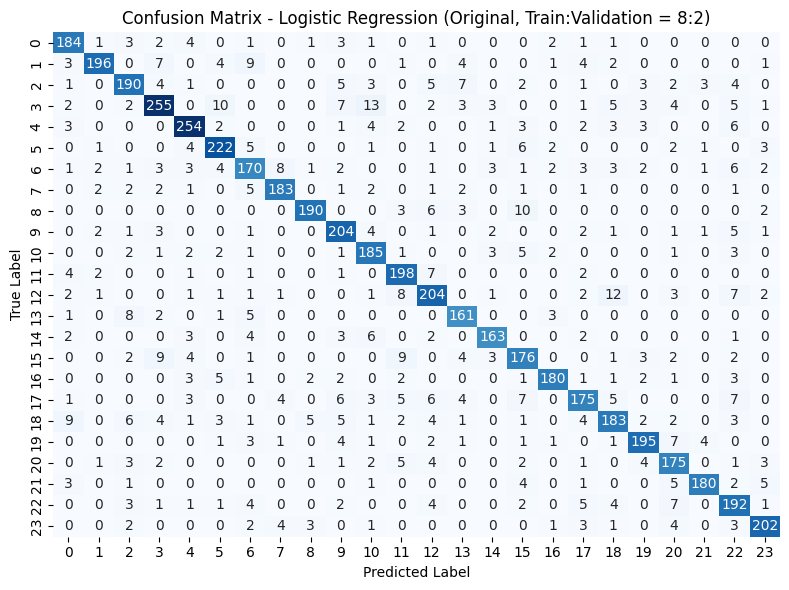


=== Logistic Regression on Original Data (Train:Validation = 7:3) ===
              Metric  Value
   Training Time (s)  88.64
      Train Accuracy 0.8749
 Validation Accuracy 0.8599
Validation Precision 0.8615
   Validation Recall 0.8599
 Validation F1-Score 0.8600




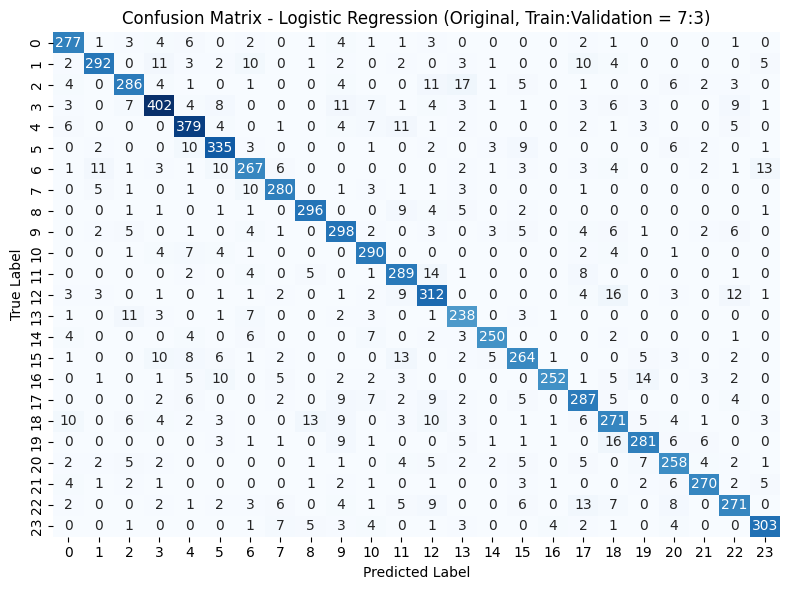


=== Logistic Regression on Original Data (Train:Validation = 6:4) ===
              Metric  Value
   Training Time (s)  80.50
      Train Accuracy 0.8718
 Validation Accuracy 0.8486
Validation Precision 0.8502
   Validation Recall 0.8486
 Validation F1-Score 0.8488




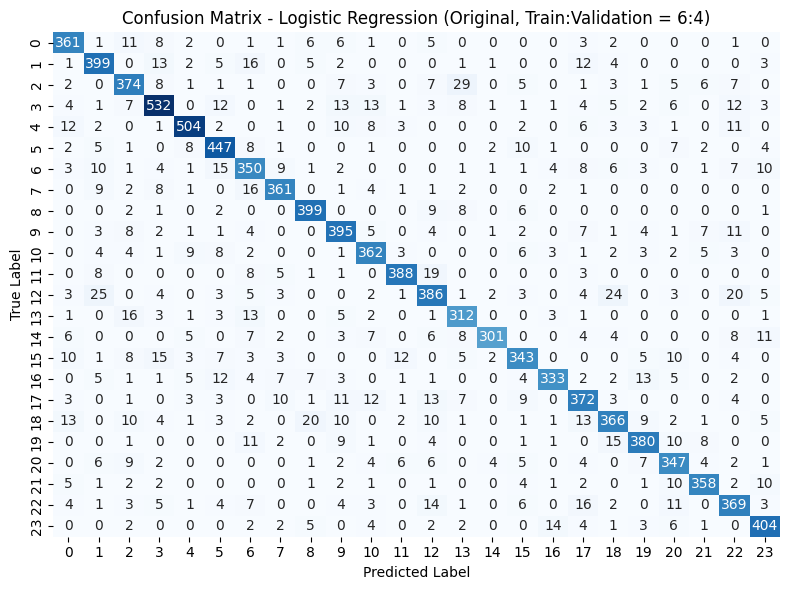

In [ ]:
result_origin = train_model(logR, X_root, y_root, [0.8, 0.7, 0.6], "Logistic Regression", 18, "Original")

In [ ]:
X_train_6, X_val_6, y_train_6, y_val_6 = train_test_split(X_root, y_root, train_size=0.6, random_state=18, stratify=y_root)
X_train_7, X_val_7, y_train_7, y_val_7 = train_test_split(X_root, y_root, train_size=0.7, random_state=18, stratify=y_root)
X_train_8, X_val_8, y_train_8, y_val_8 = train_test_split(X_root, y_root, train_size=0.8, random_state=18, stratify=y_root)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_8, result_origin[1]['softmax_train'])
pred8 = lin_reg.predict(X_val_8)
get_accuracy(y_val_8, pred8)

accuracy_score: 0.9884908112121774
precision_score: 0.9895287958115183
recall_score: 0.7590361445783133


In [ ]:
lin_reg.fit(X_train_7, result_origin[3]['softmax_train'])
pred7 = lin_reg.predict(X_val_7)
get_accuracy(y_val_7, pred7)

accuracy_score: 0.9870049504950495
precision_score: 0.9786476868327402
recall_score: 0.7352941176470589


In [ ]:
lin_reg.fit(X_train_6, result_origin[5]['softmax_train'])
pred6 = lin_reg.predict(X_val_6)
get_accuracy(y_val_6, pred6)

accuracy_score: 0.988397995173566
precision_score: 0.9675
recall_score: 0.7755511022044088


In [ ]:
from sklearn.tree import DecisionTreeRegressor

de_tree = DecisionTreeRegressor()
de_tree.fit(X_train_8, result_origin[1]['softmax_train'])
pred8 = de_tree.predict(X_val_8)
get_accuracy(y_val_8, pred8)

accuracy_score: 0.9819936885093744
precision_score: 0.8304347826086956
recall_score: 0.7670682730923695


In [ ]:
de_tree.fit(X_train_7, result_origin[3]['softmax_train'])
pred7 = de_tree.predict(X_val_7)
get_accuracy(y_val_7, pred7)

accuracy_score: 0.9836633663366336
precision_score: 0.8666666666666667
recall_score: 0.7647058823529411


In [ ]:
de_tree.fit(X_train_6, result_origin[5]['softmax_train'])
pred6 = de_tree.predict(X_val_6)
get_accuracy(y_val_6, pred6)

accuracy_score: 0.9814367922777056
precision_score: 0.8300220750551877
recall_score: 0.7535070140280561


In [ ]:
train_model(nb, X_root, y_root, [0.8, 0.7, 0.6], "Naive Bayes", 18, "Original")

##Dữ liệu đã giảm chiều

In [ ]:
X_pca = df_pca.drop(['label', 'encoded_label'], axis=1)
y_pca = df_pca['encoded_label']


In [ ]:
X_train_6, X_val_6, y_train_6, y_val_6 = train_test_split(X_pca, y_pca, train_size=0.6, random_state=18, stratify=y_pca)
X_train_7, X_val_7, y_train_7, y_val_7 = train_test_split(X_pca, y_pca, train_size=0.7, random_state=18, stratify=y_pca)
X_train_8, X_val_8, y_train_8, y_val_8 = train_test_split(X_pca, y_pca, train_size=0.8, random_state=18, stratify=y_pca)


=== Logistic Regression on PCA Data (Train:Validation = 8:2) ===
              Metric  Value
   Training Time (s)  48.76
      Train Accuracy 0.9924
 Validation Accuracy 0.9772
Validation Precision 0.9772
   Validation Recall 0.9772
 Validation F1-Score 0.9771




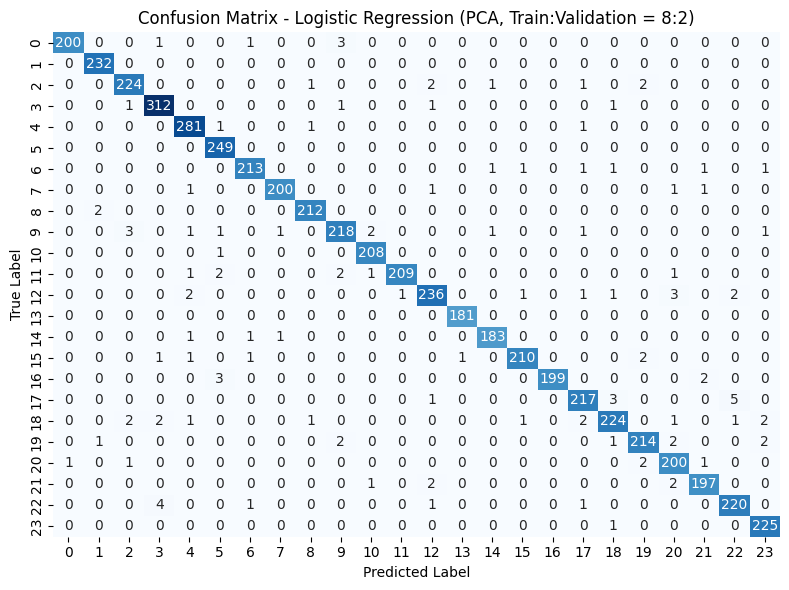


=== Logistic Regression on PCA Data (Train:Validation = 7:3) ===
              Metric  Value
   Training Time (s)  34.36
      Train Accuracy 0.9936
 Validation Accuracy 0.9774
Validation Precision 0.9774
   Validation Recall 0.9774
 Validation F1-Score 0.9773




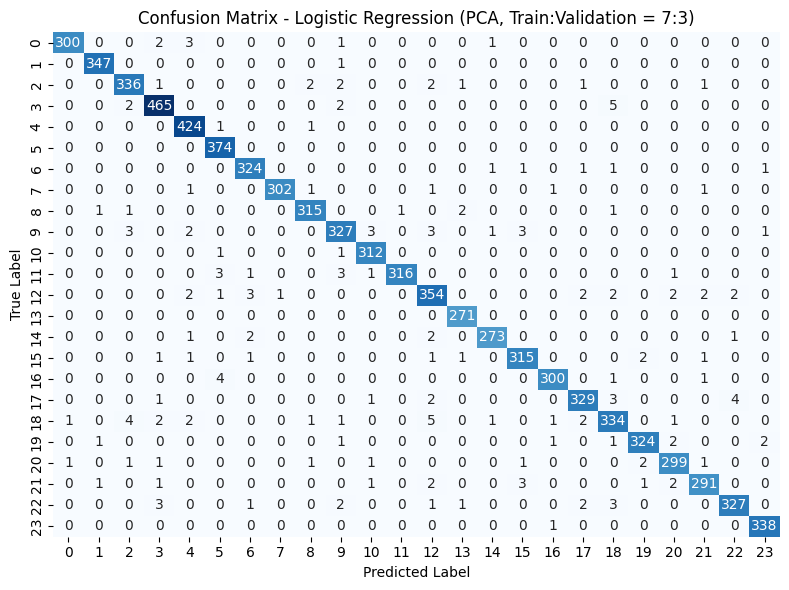


=== Logistic Regression on PCA Data (Train:Validation = 6:4) ===
              Metric  Value
   Training Time (s)  34.51
      Train Accuracy 0.9954
 Validation Accuracy 0.9766
Validation Precision 0.9767
   Validation Recall 0.9766
 Validation F1-Score 0.9766




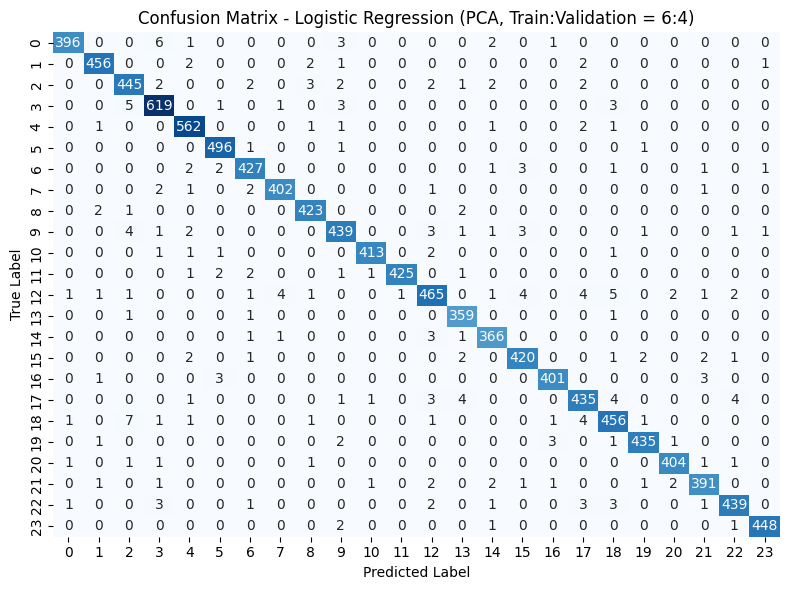

In [ ]:
result_pca = train_model(logR, X_pca, y_pca, [0.8, 0.7, 0.6], "Logistic Regression", 18, "PCA")


=== Logistic Regression on PCA Data (Train:Validation = 8:2) ===
              Metric  Value
   Training Time (s)   0.03
      Train Accuracy 0.6250
 Validation Accuracy 0.6143
Validation Precision 0.6707
   Validation Recall 0.6143
 Validation F1-Score 0.6212




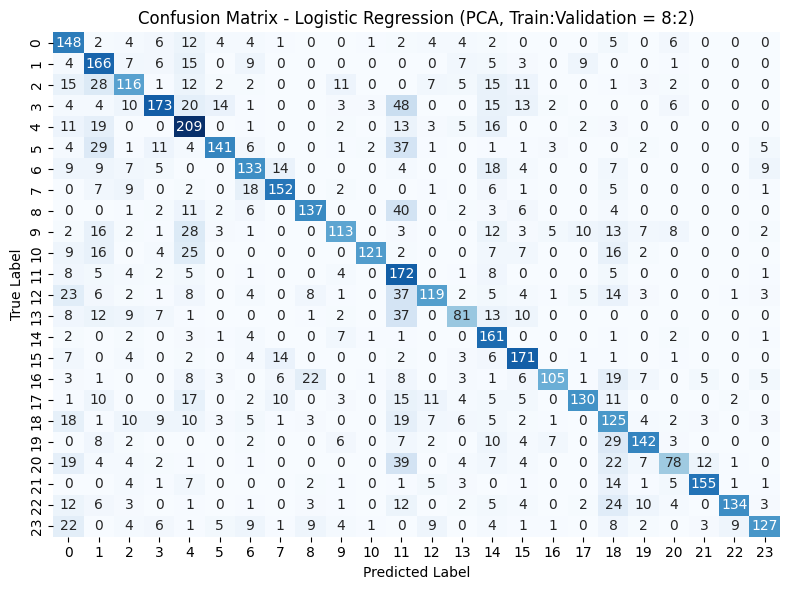


=== Logistic Regression on PCA Data (Train:Validation = 7:3) ===
              Metric  Value
   Training Time (s)   0.02
      Train Accuracy 0.6200
 Validation Accuracy 0.6113
Validation Precision 0.6675
   Validation Recall 0.6113
 Validation F1-Score 0.6181




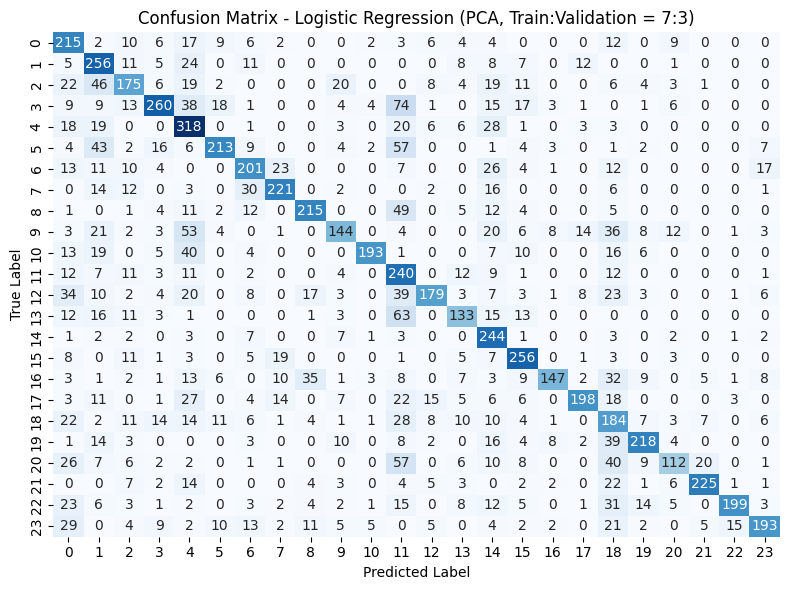


=== Logistic Regression on PCA Data (Train:Validation = 6:4) ===
              Metric  Value
   Training Time (s)   0.02
      Train Accuracy 0.6234
 Validation Accuracy 0.6065
Validation Precision 0.6640
   Validation Recall 0.6065
 Validation F1-Score 0.6146




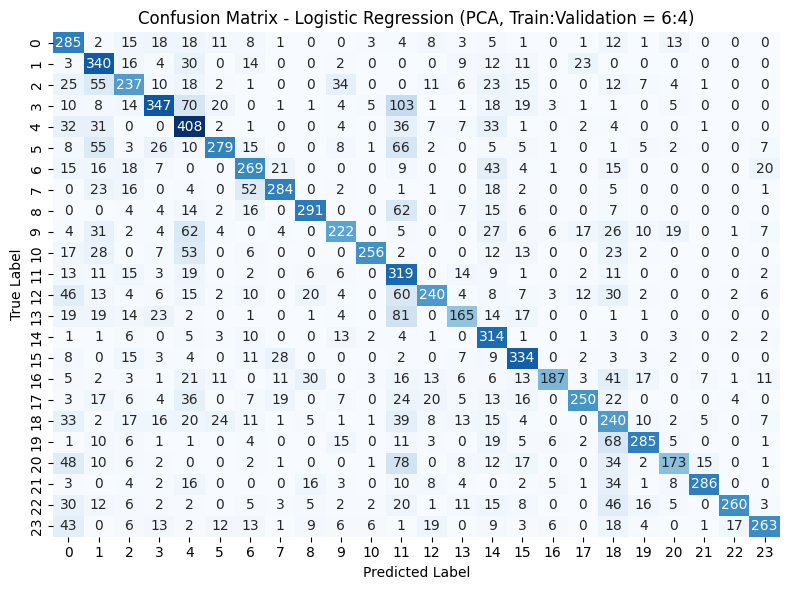

[{'train_size': 0.8,
  'data_type': 'PCA',
  'train_accuracy': 0.6250348092453356,
  'val_accuracy': 0.6142565435307221,
  'val_precision': 0.6706723531752241,
  'val_recall': 0.6142565435307221,
  'val_f1': 0.6211888195823103,
  'training_time': 0.026337862014770508},
 {'train_size': 0.7,
  'data_type': 'PCA',
  'train_accuracy': 0.6200074258738663,
  'val_accuracy': 0.6112623762376238,
  'val_precision': 0.6675390831160897,
  'val_recall': 0.6112623762376238,
  'val_f1': 0.6180987057106326,
  'training_time': 0.0243527889251709},
 {'train_size': 0.6,
  'data_type': 'PCA',
  'train_accuracy': 0.6233677826598181,
  'val_accuracy': 0.6064599962873585,
  'val_precision': 0.6639567538015311,
  'val_recall': 0.6064599962873585,
  'val_f1': 0.6146262430035739,
  'training_time': 0.021401643753051758}]

In [ ]:
train_model(nb, X_pca, y_pca, [0.8, 0.7, 0.6], "Logistic Regression", 18, "PCA")


=== Logistic Regression on PCA Data (Train:Validation = 8:2) ===
              Metric  Value
   Training Time (s)   0.01
      Train Accuracy 0.9963
 Validation Accuracy 0.9935
Validation Precision 0.9936
   Validation Recall 0.9935
 Validation F1-Score 0.9935




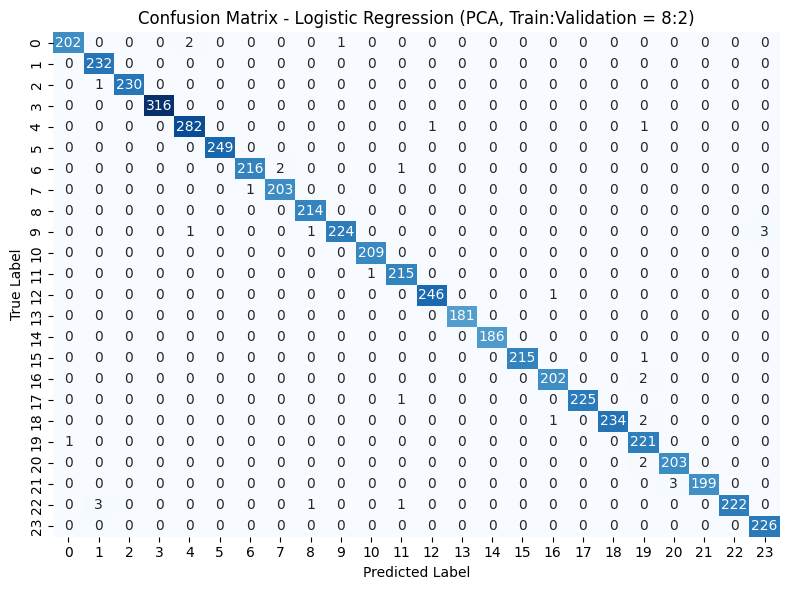


=== Logistic Regression on PCA Data (Train:Validation = 7:3) ===
              Metric  Value
   Training Time (s)   0.01
      Train Accuracy 0.9961
 Validation Accuracy 0.9920
Validation Precision 0.9920
   Validation Recall 0.9920
 Validation F1-Score 0.9920




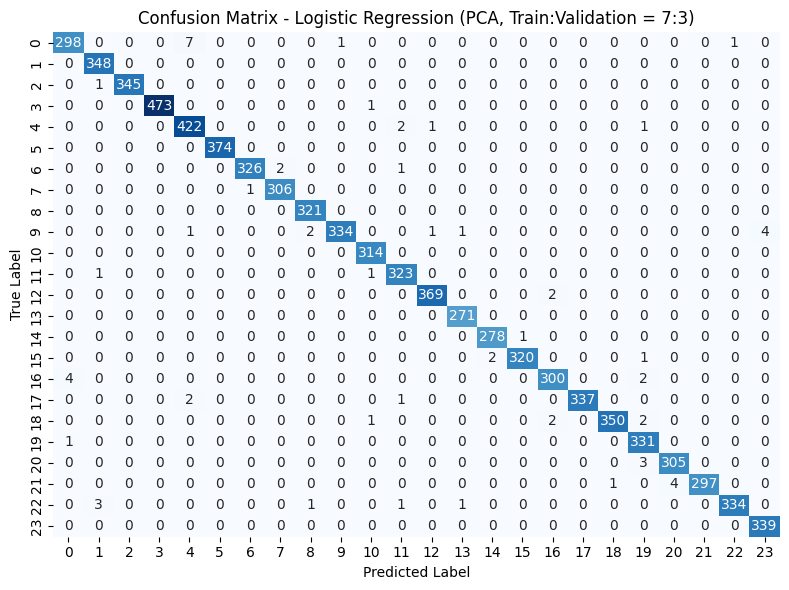


=== Logistic Regression on PCA Data (Train:Validation = 6:4) ===
              Metric  Value
   Training Time (s)   0.01
      Train Accuracy 0.9949
 Validation Accuracy 0.9893
Validation Precision 0.9894
   Validation Recall 0.9893
 Validation F1-Score 0.9893




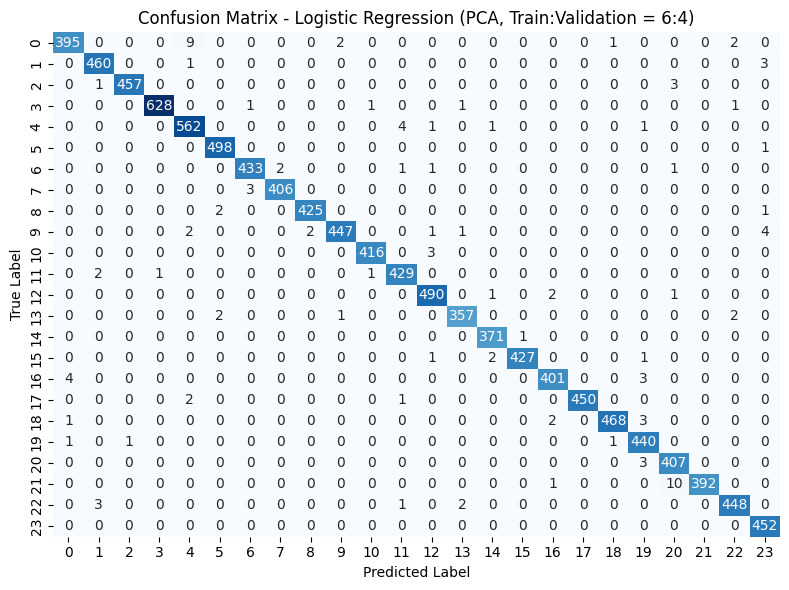

[{'train_size': 0.8,
  'data_type': 'PCA',
  'train_accuracy': 0.9962870138308735,
  'val_accuracy': 0.993502877297197,
  'val_precision': 0.9935772121217278,
  'val_recall': 0.993502877297197,
  'val_f1': 0.9935081965559347,
  'training_time': 0.009020805358886719},
 {'train_size': 0.7,
  'data_type': 'PCA',
  'train_accuracy': 0.9960748952421365,
  'val_accuracy': 0.9919554455445545,
  'val_precision': 0.9920119288688127,
  'val_recall': 0.9919554455445545,
  'val_f1': 0.9919526491943536,
  'training_time': 0.008941411972045898},
 {'train_size': 0.6,
  'data_type': 'PCA',
  'train_accuracy': 0.9949254285537471,
  'val_accuracy': 0.9893261555596807,
  'val_precision': 0.9894066818532048,
  'val_recall': 0.9893261555596807,
  'val_f1': 0.9893311652115445,
  'training_time': 0.007549285888671875}]

In [ ]:
train_model(knn, X_pca, y_pca, [0.8, 0.7, 0.6], "Logistic Regression", 18, "PCA")

In [ ]:
z = np.asarray(y_val_8).tolist()
print(z.index(3))

16


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_8, result_pca[1]['softmax_train'])
pred8 = lin_reg.predict(X_val_8)
get_accuracy(y_val_8, pred8)

accuracy_score: 0.9927603489883052
precision_score: 1.0
recall_score: 0.8433734939759037


In [ ]:
lin_reg.fit(X_train_7, result_pca[3]['softmax_train'])
pred7 = lin_reg.predict(X_val_7)
get_accuracy(y_val_7, pred7)

accuracy_score: 0.9925742574257426
precision_score: 0.9968354430379747
recall_score: 0.8422459893048129


In [ ]:
lin_reg.fit(X_train_6, result_pca[5]['softmax_train'])
pred6 = lin_reg.predict(X_val_6)
get_accuracy(y_val_6, pred6)

accuracy_score: 0.9924819008724708
precision_score: 0.995260663507109
recall_score: 0.8416833667334669


In [ ]:
de_tree = DecisionTreeRegressor()
de_tree.fit(X_train_8, result_pca[1]['softmax_train'])
pred8 = de_tree.predict(X_val_8)
get_accuracy(y_val_8, pred8)

accuracy_score: 0.9905327640616298
precision_score: 0.889763779527559
recall_score: 0.9076305220883534


In [ ]:
de_tree.fit(X_train_7, result_pca[3]['softmax_train'])
pred7 = de_tree.predict(X_val_7)
get_accuracy(y_val_7, pred7)

accuracy_score: 0.9899752475247525
precision_score: 0.8927613941018767
recall_score: 0.8903743315508021


In [ ]:
de_tree.fit(X_train_7, result_pca[3]['softmax_train'])
pred7 = de_tree.predict(X_val_7)
get_accuracy(y_val_7, pred7)

accuracy_score: 0.990470297029703
precision_score: 0.896
recall_score: 0.8983957219251337
